# 1. Simple Linear Regression

In [35]:
# Render the plots inline
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import random

# Some configuration to make our graphs prettier
style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)

## 1.1 Intro

On our journey to explore the incredible world of machine learning (ML), we will learn about the internal workings of ML algorithms and techniques, starting with one of the most basic one: univariate linear regression.

There are already plenty of courses on ML out there, but writing about these concepts help me consolidate what I already know, and bring some light to the things I should be striving to understand better.

## 1.2 What is simple linear regression?

Linear regression is a statistical method used to find the best linear fitting model between two continous variables. Such resulting models are useful for statistical relationships where we expect two variables to have some kind of linear relationship but not perfect.

Let's start with an arbitrary set of data featuring heights and weights of 10 students (this example is taken from PennState Eberly College of Science excellent [course on linear regressions](https://onlinecourses.science.psu.edu/stat501/node/252)).

You'd probably expect weight to increase when height increases, but not perfectly. This is a great example of statistical relationship.

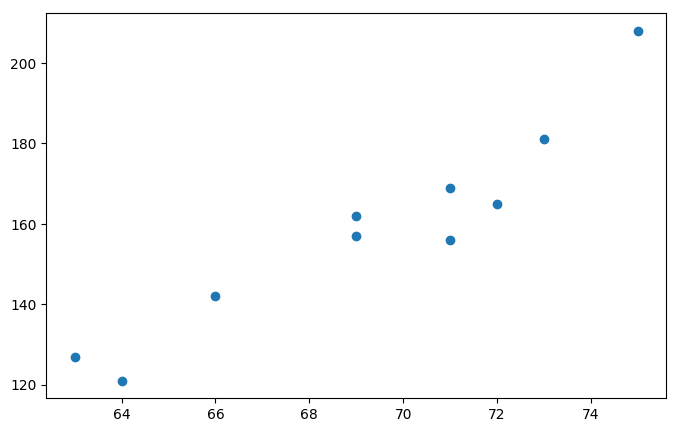

In [36]:
heights = np.array([63,  64,  66,  69,  69,  71,  71,  72,  73,  75])
weights = np.array([127, 121, 142, 157, 162, 156, 169, 165, 181, 208])

plt.scatter(heights, weights)
plt.show()

Given this scatter plot where heights are represented on the "x" axis and weights on the "y" axis, how would you procede to draw the "best fitting line" through the data?

This is where linear regression comes in.

## 1.3 Residual error and "Least Squares Criterion"


*The equation of a line can always be written like so: $y = mx + b$*

#### 1.3.1 Residual error

Let's draw two lines that could be candidates to match this dataset.

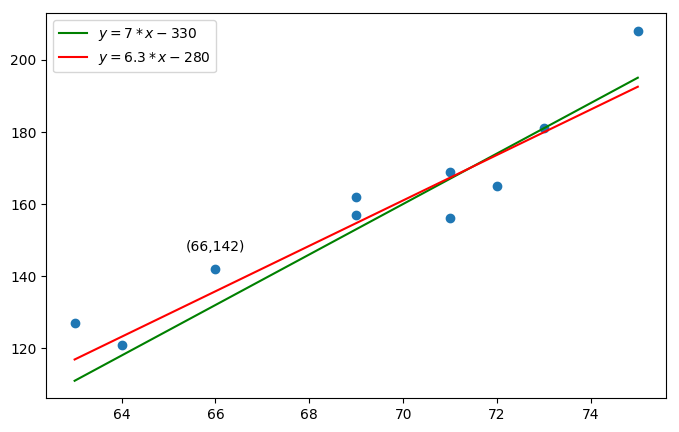

In [37]:
plt.scatter(heights, weights)

# Define our two lines
green_line = [7*x-330 for x in heights] # chosen arbitrarily
red_line = [6.3*x-280 for x in heights] # chosen arbitrarily

plt.plot(heights, green_line, color='green', label='$y = 7 * x - 330$')
plt.plot(heights, red_line, color='red', label='$y = 6.3 * x - 280$')

# We annotate a specific point
point = (heights[2], weights[2])
plt.annotate('({},{})'.format(*point), # cool thing I've learned, the "*" operator unpacks the values!
             xy=point,
             xytext=(point[0]-0.63, point[1]+5))

plt.legend()
plt.show()

These two lines seem to be good fitting lines for our dataset... but, how can we differentiate these and determine which one is the best one?

Let us consider the third student, with a height ($h_{real}$) of 66, and a weight ($w_{real}$) of 142. Let's imagine we don't know its weight, we could use our red and green lines to predict his weight ($w_{predict}$).

In this case, we would get for the green line: $w_{predict} = 7 * 66 - 330 = 132$

We define the ***prediction error*** or ***residual error*** for the experimental unit $i$ as the difference between the real value ($y_i$) and the predicted value ($\hat{y}_i$):

<p style="text-align: center;">$$e_i = y_i - \hat{y}_i$$</p>

Therefore our prediction error (or residual error) would be: $e_3 = w_{real} - w_{predict} = 142 - 132 = 10$

Likewise, for the red line, we would predict a height of: $w_{predict} = 6.3 * 66 - 280 = 135.8$

And our residual error would be: $e_3 = w_{real} - w_{predict} = 142 - 135.8 = 6.2$


Because the residual error is minimal with the red line, we could conclude that it does a better job than the green line at predicting the weight of the third student. But this is not sufficient to conclude that the red line is a better fitting line than the green one since there are other students to consider.

We need to introduce a criterion to help us decide: the ***least squares criterion***.


#### 1.3.2 Least Squares Criterion

Following the above section on residual error, we can sense here the beginning of a definition for the best fitting line: it is the line for which **the sum of the residual errors for each data point is minimal**.

To achieve this, we can invoke the ***least squares criterion*** (LSC) which aims to minimize the sum of the squared residual errors, e.g. we need to find the line that minimizes the following quantity:

<p style="text-align: center">$$Q = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$</p>

**NB:** Notice that we square the residual errors to avoid them canceling each other. Prediction errors can be positive or negative which would lead to unexpected results. Moreover, using the squared residual error tends to put more emphasis on outliers which is exactly what we want.

If we compute this quantity for the red and green line we obtain:

In [38]:
def compute_LSC(xs, ys_real, ys_pred):
    """Computes the sum of the squared residual errors"""
    Q = sum([(y_real-y_pred)**2 for y_real, y_pred in zip(ys_real, ys_pred)])
    return Q

Q_green = compute_LSC(heights, weights, green_line)
Q_red = compute_LSC(heights, weights, red_line)

print('\nQ_green = {:.2f}\nQ_red = {:.2f}'.format(Q_green, Q_red))


Q_green = 837.00
Q_red = 649.87


Since  $Q_{red} < Q_{green}$, the LSC tells us that the red line is a better fitting line than the green one, but we want to find the best of all.

## 1.4 Best fitting line

So we know now that our best fitting line is the one that answers the LSC, e.g. that minimizes the quantity $Q$. Since the equation of the line is: $y = mx + b$, we have two parameters to determine.

We need to find the *slope* $m$ and the *intercept* $b$ that minimizes $Q$ where:

<p style="text-align: center">$$Q = \sum_{i=1}^{n} (y_i - (mx_i + b))^2$$</p>

Here, we just replaced the prediction with the actual computation of it with the equation of a line.

The formulas to determine the slope and intercept of the best fitting line are the following (where $\overline{x}$ and $\overline{y}$ are respectively the mean of the x values and y values):

<p style="text-align: center">
    $$m = \frac
            {\overline{x}\cdot\overline{y} - \overline{x\cdot y}}
            {(\overline{x})^2 - \overline{x^2}}$$
</p>

<p style="text-align: center">$$b = \overline{y} - m\overline{x}$$</p>

Let's program this:

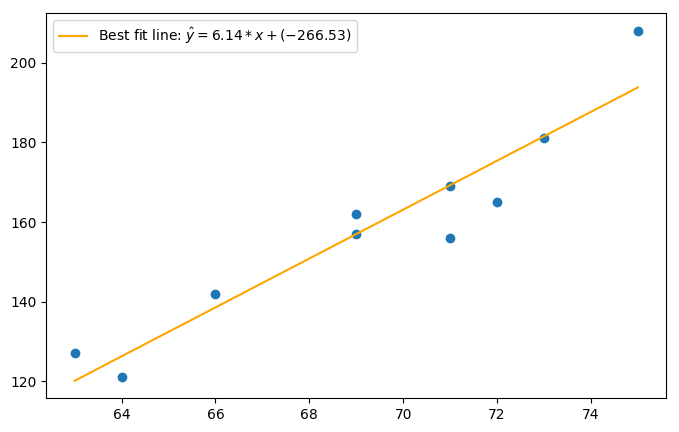

In [46]:
def compute_BFL_parameters(xs,ys):
    """Computes the slope and intercept for the best fitting line"""
    m = ((np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) /
         (np.square(np.mean(xs)) - np.mean(np.square(xs))))
    b = np.mean(ys) - m * np.mean(xs)
    return (m,b)

def generate_BFL(xs, ys):
    """Generates the best fitting line for a given dataset"""
    m, b = compute_BFL_parameters(xs,ys)
    return [m*x+b for x in xs]

# compute the slope and intercept of the best fitting line
m, b = compute_BFL_parameters(heights, weights)

# generate the best fitting line for our heights and weights dataset
regression_line = generate_BFL(heights, weights)

plt.scatter(heights, weights)
plt.plot(heights, regression_line,
         color='orange',
         label='Best fit line: $\hat{{y}} = {:.2f} * x + ({:.2f})$'.format(m,b))

plt.legend()
plt.show()

And here's our best fit line! Success! But now that we have a best fit line, we can still ask ourselves, is this line a good fitting line? How good is this best fit line to model our data? In the next section we will look at different datasets with different distributions to explain this idea in more detail.

## 1.5 Coefficient of determination, R-squared value

Let us write some Python code to generate fake datasets with different distributions and experiment our best fit line computation.

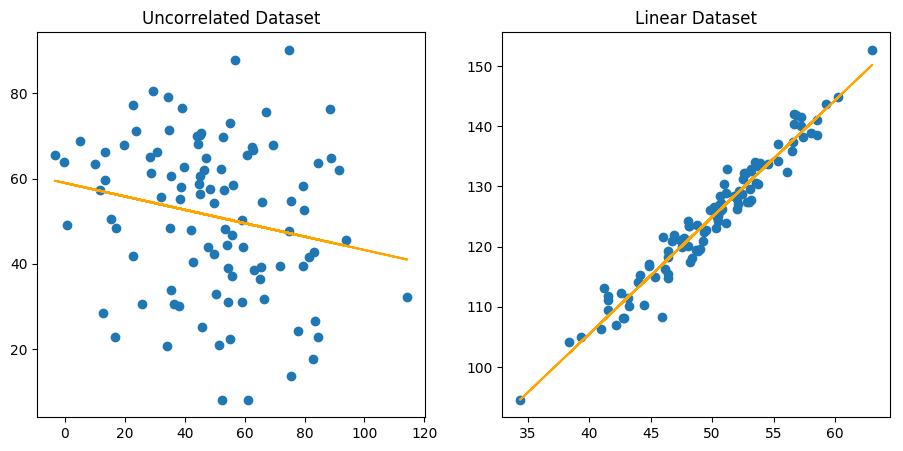

In [43]:
def generate_dataset(sample_size, mean, variance, slope=2, correlation=False):
    """Generates controllable fake datasets"""
    xs = []
    ys = []
    for i in range(sample_size):
        if correlation:
            val = random.normalvariate(mean, variance)
            xs.append(val)
            ys.append(slope*val+random.normalvariate(mean/2,variance/2))
        else:
            xs.append(random.normalvariate(mean, variance))
            ys.append(random.normalvariate(mean, variance))
    return np.array(xs), np.array(ys)

# feel free to modify these values to experiment with other datasets
SAMPLE_SIZE = 100

RANDOM_MEAN = 50
RANDOM_VARIANCE = 20

LINEAR_MEAN = 50
LINEAR_VARIANCE = 5
LINEAR_SLOPE = 2

# generate two datasets, one with a weak relation between xs ans ys, and one with a strong linear relation
random_dataset = generate_dataset(SAMPLE_SIZE, RANDOM_MEAN, RANDOM_VARIANCE, correlation=False)
linear_dataset = generate_dataset(SAMPLE_SIZE, LINEAR_MEAN, LINEAR_VARIANCE, LINEAR_SLOPE, correlation=True)

# compute their respective regression lines
random_dataset_BFL = generate_BFL(*random_dataset)
linear_dataset_BFL = generate_BFL(*linear_dataset)

# make the graphs more lisible
plt.figure(figsize=(11,5))

# plot our fake datasets with their respective best fitting lines
plt.subplot(1,2,1)
plt.scatter(*random_dataset)
plt.plot(random_dataset[0], random_dataset_BFL, color='orange')
plt.title('Uncorrelated Dataset')

plt.subplot(1,2,2)
plt.scatter(*linear_dataset)
plt.plot(linear_dataset[0], linear_dataset_BFL, color='orange')
plt.title('Linear Dataset')

plt.show()

Considering the two above distributions, which regression line would you say is the best one? Clearly the one to the right.

Here we made it clear by comparing a completely uncorrelated dataset with a linear one, but if you think about it, you can compute a regression line for any kind of dataset. It is therefore legitimate to ask ourselves, how good is our best fit line?

To answer this question we introduce a new quantity: the **coefficient of determination**, which is one way to express how well a best fit line models a dataset.

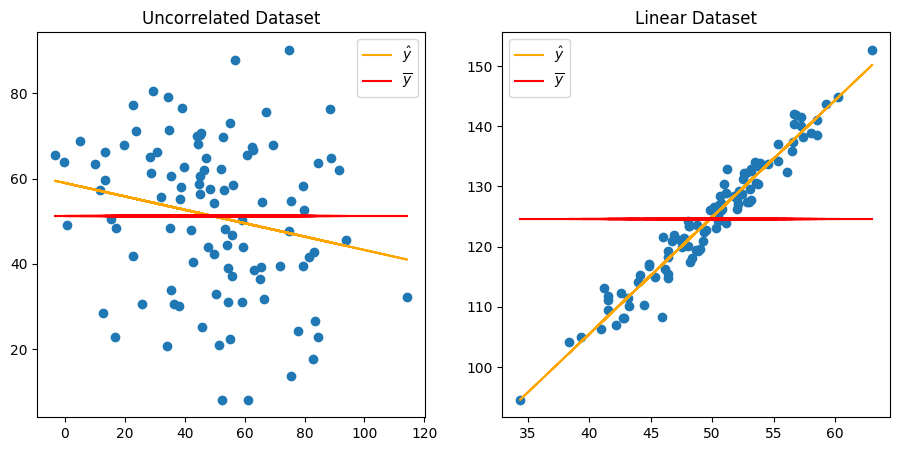

In [45]:
# make the graphs more lisible
plt.figure(figsize=(11,5))

# plot our fake datasets with their respective best fitting lines
plt.subplot(1,2,1)
plt.scatter(*random_dataset)
plt.plot(random_dataset[0], random_dataset_BFL, color='orange', label='$\hat{y}$')
plt.plot(random_dataset[0], [np.mean(random_dataset[1])] * sample_size, color='red', label='$\overline{y}$')
plt.title('Uncorrelated Dataset')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(*linear_dataset)
plt.plot(linear_dataset[0], linear_dataset_BFL, color='orange', label='$\hat{y}$')
plt.plot(linear_dataset[0], [np.mean(linear_dataset[1])] * sample_size, color='red', label='$\overline{y}$')
plt.title('Linear Dataset')
plt.legend()

plt.show()

You can picture the coefficient of determination as the proportion (it's a value between $0$ and $1$) representing how well the best fit line helps us making better predictions against the mean line.

But let us first introduce some quantities:
* SSR, also called *regression sum of squares*, quantifies how far the regression line $\hat{y}$ is from the horizontal mean line $\overline{y}$:
<p style="text-align: center">$$SSR = \sum_{i=1}^{n}(\hat{y}_i-\overline{y})^2$$</p>
* SSE, also called *error sum of squares*, quantifies how much the data points vary around the regression line $\hat{y}$:
<p style="text-align: center">$$SSE = \sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$</p>
* SSTO, also called *total sum of squares*, quantifies how much the data points vary around the mean line $\overline{y}$:
<p style="text-align: center">$$SSTO = \sum_{i=1}^{n}(y_i-\overline{y})^2$$</p>

Now we can define the ***coefficient of determination*** as follows:

<p style="text-align: center">$$r^2 = \frac{SSR}{SSTO} = 1 - \frac{SSE}{SSTO}$$</p>

Let's compute this coefficient for our two fake datasets:

In [42]:
def compute_r_squared(ys_orig, ys_regression):
    """Computes the r-squared value for the specified regression line"""
    SSE = sum((ys_orig - ys_regression)**2)
    SSTO = sum((ys_orig - [np.mean(ys_orig)] * len(ys_orig))**2)
    return 1 - (SSE/SSTO)

random_r_squared = compute_r_squared(random_dataset[1], random_dataset_BFL)
linear_r_squared = compute_r_squared(linear_dataset[1], linear_dataset_BFL)

print('\nRandom dataset: r_squared = {:.5f}\nLinear dataset: r_squared = {:.5f}\n'.format(random_r_squared, linear_r_squared))


Random dataset: r_squared = 0.00043
Linear dataset: r_squared = 0.95354



We can observe that the value of $r^2$ is close to $0$ for our random dataset, while it's fairly close to $1$ for our linear dataset. In fact, the closer the value of $r^2$ is to $1$, the "better".

Literally, the coefficient of determination is the *percentage of the response variable (the "ys") variation that is "explained" by a linear model*. That is why the higher the value, the better the model fits the data.

Here we observe that the regression line of the linear model has a high $r^2$ value, which means that it fits well the data. On the contrary, our linear model on the uncorrelated dataset has a really low $r^2$ value, which means that this model does not fit well the data.

Be careful though, $r^2$ might be an intuitive measure of how well a linear model fits some data, but it does not indicate whether a regression model is adequate. Good models can yield low coefficients of determination, while the contrary is also possible. You can learn more about this [here](https://onlinecourses.science.psu.edu/stat501/node/255).

## 1.6 Conclusion

Today we learned what is simple linear regression and how we can apply it to find the best linear model to fit a given dataset. We've also discussed one technique to evaluate how well this model fits our data thanks to the coefficient of determination.

However, there is much more to say about linear regression. Since this post aims to give a quick overview on linear regression we won't dive deeper on this subject. In a future post, I will show our we can apply linear regression on real world data using the ***scikit-learn*** machine learning library.